
📋 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1033
           1       0.54      0.71      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407


✅ ROC AUC Score: 0.829


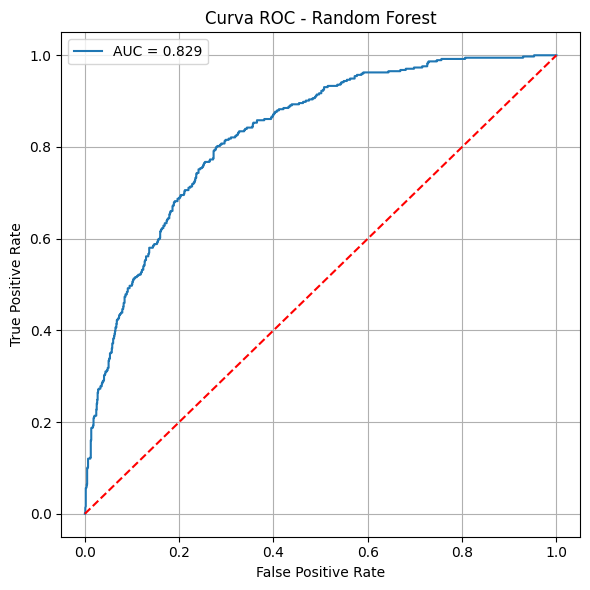

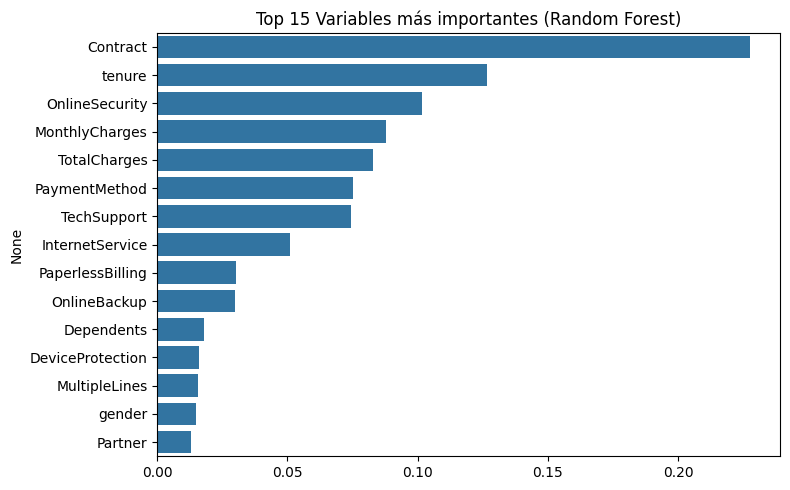

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


df = pd.read_csv("teleco_clean.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# No eliminamos outliers

X = df.drop(columns=['Churn'])
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train_res, y_train_res)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("\n📋 Reporte de Clasificación:\n", classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print(f"\n✅ ROC AUC Score: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Importancia de variables
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Variables más importantes (Random Forest)")
plt.tight_layout()
plt.show()




## Conclusión

En el **árbol de decisión**, SMOTE introduce ruido que el modelo aprende como si fuera real, **empeorando el rendimiento**.

En cambio, en **Random Forest**, ese ruido es **diluido entre múltiples árboles**, lo que permite **aprovechar los beneficios del balance sin sobreajustar**, mejorando así el **recall y el AUC**.

Las técnicas de **eliminación de outliers** y la **búsqueda de hiperparámetros** no aportaron mejoras adicionales, posiblemente debido a la **pérdida de información relevante** o a que la configuración base del modelo ya era suficientemente óptima.
